In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import random 
from datetime import datetime 

In [2]:
def Model1_Simulation(q1, q2, lambda_1, lambda_2, lambda_3, gamma_1, gamma_2, gamma_3, TERM):
    r1 = 1-q1
    r2 = 1-q2
    TNOW = 0  
    Q1 = 0
    Q2 = 0
    Q3 = 0 
    AQ1 = 0 
    AQ2 = 0 
    AQ3=0
    
    # Initialise number of iterations to be 0 
    iteration = 0 
    #Initialise number of arrivals, matches and abandonments to be 0 
    Matches_CE = 0
    Matches_EE = 0 
    Matches_Job = 0 
    
    Arrivals_CE = 0
    Arrivals_EE = 0 
    Arrivals_Job = 0 
    
    Abandonment_CE = 0
    Abandonment_EE = 0
    Abandonment_Job = 0 
    
    
    
    # Initalise vector to store the time 
    Time_v = []
    
    
    # Initialize event calander to be a 4d vector 
    EC= ([0]*4)
    if(lambda_1 > 0):
        EC[0] = -(np.log(1-np.random.uniform(0, 1))/lambda_1)
    else:
        EC[0] = TERM+1
    EC[1] = -(np.log(1-np.random.uniform(0, 1))/lambda_2)
    EC[2] = -(np.log(1-np.random.uniform(0, 1))/lambda_3)
    EC[3] = TERM
    EC = np.array(EC)
    
    while TNOW < TERM:
        #print(EC)
        iteration +=1
        
        # Time of next event is minimum entry in event calender
        TNEXT = EC.min()
        
        # Type of next event (index of minimum entry in event calender)
        ENEXT = EC.argmin()
        
        # Update area statistics
        AQ1 += ((TNEXT-TNOW)*Q1)
        AQ2 += ((TNEXT-TNOW)*Q2)
        AQ3 += ((TNEXT-TNOW)*Q3)
        
        # Update time vector 
        TNOW = TNEXT
        Time_v = np.append(Time_v, TNOW)
        

        # Next event is arrival of a CE
        if(ENEXT==0):
           # print('CE arrival')
            
            # Increase CE arrivals by 1 
            Arrivals_CE += 1 
            
            # Initialise m=0 to be the matchings found for this CE 
            m=0
            
            # If there are jobs to match with 
            if(Q3 > 0 ):
                
                
                
                # Loop through each job and check matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        #print('CE matches with job')
                        # CE matches with job and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase CE and job matches by 1
                        Matches_CE += 1 
                        Matches_Job += 1 
                        
                        # Update event calender to remove abandonment time of that job
                        EC = np.delete(EC, (4+Q1+Q2+i))
                
                        break
                
            # If there are no matches found or possible then CE joins the queue 
            if(m == 0):
              #  print('No match join queue')
                # update EC to inlude abandonment time of that CE 
                EC=np.insert(EC, (4+Q1), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_1)))
                
                # Joins queue 
                Q1 += 1
                
                
                
            # Update EC to include next arrival time of CE
            EC[0]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_1)
        
        
        
        # Next event is arrival of a EE
        elif(ENEXT==1):
           # print('EE arrival')
            
            # Increase EE arrivals by 1 
            Arrivals_EE += 1 
            
            # Initialise m=0 to be the matchings found for this EE 
            m=0
            
            # If there are jobs to match with 
            if(Q3 > 0 ):

                
                # Loop through each job and check matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                       # print('EE matches with job')
                        # EE matches with job and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase EE and job matches by 1
                        Matches_EE += 1 
                        Matches_Job += 1 
                        
                        # Update event calender to remove abandonment time of that job
                        EC = np.delete(EC, (4+Q1+Q2+i))
                        break
                
            # If there are no matches found or possible then EE joins the queue 
            if(m == 0):
              #  print('No match join queue ')
                # update EC to inlude abandonment time of that EE 
                EC=np.insert(EC, (4+Q1+Q2), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_2)))
    
                
                # Joins queue 
                Q2 += 1
                
            
                
                
            # Update EC to include next arrival time of EE
            EC[1]=TNOW-(np.log(1-np.random.uniform(0, 1))/lambda_2)
            
        # Next event is arrival of job 
        elif(ENEXT == 2):
          #  print('Job arrival')
            
            # Initialise matches to be 0 
            m = 0 
            
            # Increase arrivals by 1
            Arrivals_Job += 1
            
            # CE > EE so first check if there are matches with CE
            if(Q1 > 0):
                
                # Loop through each CE and check for a match
                for i in range(Q1):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < 1-r (probability of matching) then a match is found
                    if(u < (1-r1)):
                        
                        # Job Matches and leaves the system with the CE
                       # print('Job Matches with CE')
                        m += 1 
                        Q1 -= 1
                        
                        # Increase matches of job and CE by 1 
                        Matches_Job += 1
                        Matches_CE += 1 
                        
                        # Update event calender to remove abandonment time of the CE 
                        EC = np.delete(EC, (4+i))
                        break 
                        
            # If job didnt match with CE and there are EEs check for match
            if(Q2 > 0 and m == 0):
                
                # Loop through each EE and check for a match 
                for i in range(Q2):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < 1-2 (probability of matching) then a match is found
                    if(u < (1-r2)):
                      #  print('Job matches with EE')
                        # Job Matches and leaves the system with the EE
                        
                        m += 1 
                        Q2 -= 1
                        
                        # Increase matches of job and EE by 1 
                        Matches_Job += 1
                        Matches_EE += 1 
                        
                        # Update event calender to remove abandonment time of the EE 
                        EC = np.delete(EC, (4+Q1+i))
                        break
            # If no CE or EE to match or no match found, then job joins the job queue  
            if(m == 0):
             #   print('No match join queue')
                # Update EC to include abandonment time of the job
                EC = np.insert(EC, (4+Q1+Q2+Q3), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_3)))
                # Job joinss job queue 
                Q3 += 1 
                
            # Update event calander to include next arrival of job 
            EC[2]=TNOW-(np.log(1-np.random.uniform(0, 1))/lambda_3)
        
        
        # Next event is abandonment of CE
        elif((ENEXT>3) and (ENEXT<=(3+Q1))):
          #  print('CE abandonment')
            # Q1 decreases by 1 
            Q1 -= 1
            # Abandonment increases by 1
            Abandonment_CE += 1
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
            
            
        # If next event is an abandonment of EE (Q2)
        elif((ENEXT>(3+Q1)) and (ENEXT<=(3+Q1+Q2))):
          #   print('EE abandonment')
            # Q2 decreases by 1 
             Q2 -= 1
            # Abandonment Increases by 1
             Abandonment_EE += 1
            # Remove abandonment time from event calendar 
             EC = np.delete(EC, ENEXT)
            #print('Q2 abandonment')
            #print(EC)
        
        # Next event is abandonment of Job (Q3)
        elif((ENEXT>(3+Q1+Q2)) and (ENEXT<=(3+Q1+Q2+Q3))):
            # Q3 decreases by 1
            Q3 -= 1
             # Abandonment increases by 1
            Abandonment_Job += 1
             # Remove abandonment time from event calendar
            EC = np.delete(EC, ENEXT)
             
        
             
    T_Q = AQ1+AQ2+AQ3  
    if(Arrivals_CE > 0):
        CEMatchRate = Matches_CE/Arrivals_CE
        CEAbandonRate = Abandonment_CE/Arrivals_CE
    else:
        CEMatchRate = 0
        CEAbandonRate = 0
    if(Arrivals_EE>0):
        EEMatchRate = Matches_EE/Arrivals_EE
        EEAbandonRate = Abandonment_EE/Arrivals_EE
    else:
        EEMatchRate = 0 
        EEAbandonRate = 0
    if(Arrivals_Job > 0):
        JobMatchRate = Matches_Job/Arrivals_Job
        JobAbandonRate = Abandonment_Job/Arrivals_Job
    else:
        JobMatchRate = 0
        JobAbandonRate = 0 
    if(Arrivals_CE +Arrivals_EE+Arrivals_Job > 0):
        TotalMatchRate = ((Matches_CE+Matches_EE+Matches_Job)/(Arrivals_CE+Arrivals_EE+Arrivals_Job))
        TotalAbandonRate = ((Abandonment_CE+Abandonment_EE+Abandonment_Job)/(Arrivals_CE+Arrivals_EE+Arrivals_Job))
    else:
        TotalMatchRate = 0
        TotalAbandonRate = 0
        
    
    
    Av_AQ1= AQ1/TERM
    Av_AQ2= AQ2/TERM
    Av_AQ3= AQ3/TERM
    Av_Total= T_Q/TERM
    

    
    return Av_AQ1, Av_AQ2, Av_AQ3, CEMatchRate, EEMatchRate, JobMatchRate, TotalMatchRate, CEAbandonRate, EEAbandonRate, JobAbandonRate, TotalAbandonRate , Av_Total



             
             

        
        
                
                        
            
                
                
        

In [13]:
print(datetime. now())
Abandonment_time = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

CE_Match_rates = []
EE_Match_rates = []
Job_Match_rates = []
Total_Match_rates = []
CE_Abandon_rates = []
EE_Abandon_rates = []
Job_Abandon_rates = []
Total_Abandon_rates = []
CE_Queue_length = []
EE_Queue_length = []
Job_Queue_length = []
Total_Queue_length = []



for i in range(len(Abandonment_time)):
    print(Abandonment_time[i])
    print(i)
    CE_Rep_m_rate = []
    EE_Rep_m_rate = []
    Job_Rep_m_rate = []
    Total_Rep_m_rate = []
    CE_Rep_a_rate = []
    EE_Rep_a_rate = []
    Job_Rep_a_rate = []
    Total_Rep_a_rate = []
    CE_Rep_q_length = []
    EE_Rep_q_length = []
    Job_Rep_q_length = []
    Total_Rep_q_length = []
    
    for j in range(10):
        print(j)
        print(datetime. now())
        rep_results=Job_sim(0.75, 0.5, 1, 1, 1, Abandonment_time[i], 0.1, 0.05, 30000)
        CE_Rep_m_rate = np.append(CE_Rep_m_rate, rep_results[3])
        EE_Rep_m_rate = np.append(EE_Rep_m_rate, rep_results[4])
        Job_Rep_m_rate = np.append(Job_Rep_m_rate, rep_results[5])
        Total_Rep_m_rate = np.append(Total_Rep_m_rate, rep_results[6])
        CE_Rep_a_rate = np.append(CE_Rep_a_rate, rep_results[7])
        EE_Rep_a_rate = np.append(EE_Rep_a_rate, rep_results[8])
        Job_Rep_a_rate = np.append(Job_Rep_a_rate, rep_results[9])
        Total_Rep_a_rate = np.append(Total_Rep_a_rate, rep_results[10])
        CE_Rep_q_length = np.append(CE_Rep_q_length, rep_results[0])
        EE_Rep_q_length = np.append(EE_Rep_q_length, rep_results[1])
        Job_Rep_q_length = np.append(Job_Rep_q_length, rep_results[2])
        Total_Rep_q_length = np.append(Total_Rep_q_length, rep_results[11])
    CE_Match_rates = np.append(CE_Match_rates, np.average(CE_Rep_m_rate))
    EE_Match_rates = np.append(EE_Match_rates, np.average(EE_Rep_m_rate))
    Job_Match_rates = np.append(Job_Match_rates, np.average(Job_Rep_m_rate))
    Total_Match_rates = np.append(Total_Match_rates, np.average(Total_Rep_m_rate))
    CE_Abandon_rates = np.append(CE_Abandon_rates, np.average(CE_Rep_a_rate))
    EE_Abandon_rates = np.append(EE_Abandon_rates, np.average(EE_Rep_a_rate))
    Job_Abandon_rates = np.append(Job_Abandon_rates, np.average(Job_Rep_a_rate))
    Total_Abandon_rates = np.append(Total_Abandon_rates, np.average(Total_Rep_a_rate))
    CE_Queue_length = np.append(CE_Queue_length, np.average(CE_Rep_q_length))
    EE_Queue_length = np.append(EE_Queue_length, np.average(EE_Rep_q_length))
    Job_Queue_length = np.append(Job_Queue_length, np.average(Job_Rep_q_length))
    Total_Queue_length = np.append(Total_Queue_length, np.average(Total_Rep_q_length))
    
    print(CE_Match_rates)
    print(EE_Match_rates)
    print(Job_Match_rates)
    print(Total_Match_rates)
    print(CE_Abandon_rates)
    print(EE_Abandon_rates)
    print(Job_Abandon_rates)
    print(Total_Abandon_rates)
    print(CE_Queue_length)
    print(EE_Queue_length)
    print(Job_Queue_length)
    print(Total_Queue_length)

    
    
print(datetime. now())   

2023-08-05 14:33:13.313646
0.1
0
0
2023-08-05 14:33:13.316028
1
2023-08-05 14:33:33.974838
2
2023-08-05 14:33:57.042220
3
2023-08-05 14:34:19.607160
4
2023-08-05 14:34:42.047726
5
2023-08-05 14:35:04.831106
6
2023-08-05 14:35:28.453023
7
2023-08-05 14:35:58.003214
8
2023-08-05 14:36:27.041437
9
2023-08-05 14:36:42.513964
[0.75430188]
[0.24168105]
[0.99888325]
[0.66413131]
[0.24560473]
[0.75801996]
[0.00111675]
[0.33573752]
[2.46618272]
[7.60411749]
[0.02196598]
[10.0922662]
0.2
1
0
2023-08-05 14:37:03.760742
1
2023-08-05 14:37:25.311129
2
2023-08-05 14:37:45.724725
3
2023-08-05 14:38:05.022024
4
2023-08-05 14:38:21.369672
5
2023-08-05 14:38:40.267798
6
2023-08-05 14:38:59.140630
7
2023-08-05 14:39:17.700224
8
2023-08-05 14:39:34.328026
9
2023-08-05 14:39:51.942949
[0.75430188 0.66494674]
[0.24168105 0.33330242]
[0.99888325 0.99796756]
[0.66413131 0.66547468]
[0.24560473 0.33501659]
[0.75801996 0.6664875 ]
[0.00111675 0.00203244]
[0.33573752 0.33444312]
[2.46618272 1.67552641]
[7.604117

1
2023-08-05 14:59:36.700874
2
2023-08-05 14:59:47.752964
3
2023-08-05 14:59:58.971637
4
2023-08-05 15:00:09.964384
5
2023-08-05 15:00:21.063794
6
2023-08-05 15:00:31.989955
7
2023-08-05 15:00:44.065897
8
2023-08-05 15:00:56.044003
9
2023-08-05 15:01:07.367650
[0.75430188 0.66494674 0.60412582 0.55894278 0.52419005 0.49490062
 0.47165596 0.45115776 0.43350522 0.4183857 ]
[0.24168105 0.33330242 0.39333565 0.43730647 0.47185437 0.49777464
 0.52237003 0.54179585 0.5590875  0.5738133 ]
[0.99888325 0.99796756 0.99732328 0.99643569 0.9957293  0.99506826
 0.99450527 0.99366948 0.99303513 0.99275689]
[0.66413131 0.66547468 0.66489697 0.66413162 0.6639358  0.66230235
 0.66275632 0.662145   0.66180749 0.66160046]
[0.24560473 0.33501659 0.39582415 0.44102718 0.47578996 0.50506608
 0.52831744 0.54882555 0.56646473 0.58159095]
[0.75801996 0.6664875  0.60650424 0.56246699 0.52797882 0.50206496
 0.47750991 0.45799115 0.44080896 0.42602642]
[0.00111675 0.00203244 0.00267672 0.00356431 0.00426401 0.004

In [7]:
# Results 

gamma_1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
CE_Match_rates = [0.75430188, 0.66494674, 0.60412582, 0.55894278, 0.52419005, 0.49490062, 0.47165596, 0.45115776, 0.43350522, 0.4183857]
EE_Match_rates = [0.24168105, 0.33330242, 0.39333565, 0.43730647, 0.47185437, 0.49777464, 0.52237003, 0.54179585, 0.5590875, 0.5738133]
Job_Match_rates = [0.99888325, 0.99796756, 0.99732328, 0.99643569, 0.9957293, 0.99506826, 0.99450527, 0.99366948, 0.99303513, 0.99275689]
Total_Match_rates = [0.66413131, 0.66547468, 0.66489697, 0.66413162, 0.6639358, 0.66230235, 0.66275632, 0.662145, 0.66180749, 0.66160046]
CE_Abandon_rates = [0.24560473, 0.33501659, 0.39582415, 0.44102718, 0.47578996, 0.50506608, 0.52831744, 0.54882555, 0.56646473, 0.58159095]
EE_Abandon_rates = [0.75801996, 0.6664875, 0.60650424, 0.56246699, 0.52797882, 0.50206496, 0.47750991, 0.45799115, 0.44080896, 0.42602642]
Job_Abandon_rates = [0.00111675, 0.00203244, 0.00267672, 0.00356431, 0.00426401, 0.00493174, 0.00548471, 0.00633052, 0.00695491, 0.00723646]
Total_Abandon_rates = [0.33573752, 0.33444312, 0.33503295, 0.33578271, 0.33599972, 0.3376331, 0.33719146, 0.33777836, 0.33814464, 0.33833617]
CE_Queue_length = [2.46618272, 1.67552641, 1.31004122, 1.09656606, 0.95151379, 0.84243065, 0.75756621, 0.68845027, 0.6301015, 0.58167337]
EE_Queue_length = [7.60411749, 6.64382734, 6.05170707, 5.6341277, 5.27065874, 5.00829869, 4.79607055, 4.58436882, 4.40860305, 4.27110636]
Job_Queue_length = [0.02196598, 0.04067974, 0.05184772, 0.07282617, 0.08446479, 0.09853861, 0.11212927, 0.12215735, 0.14023085, 0.14789128]
Total_Queue_length = [10.0922662, 8.36003349, 7.41359601, 6.80351993, 6.30663732, 5.94926795, 5.66576603, 5.39497643, 5.1789354, 5.00067102]


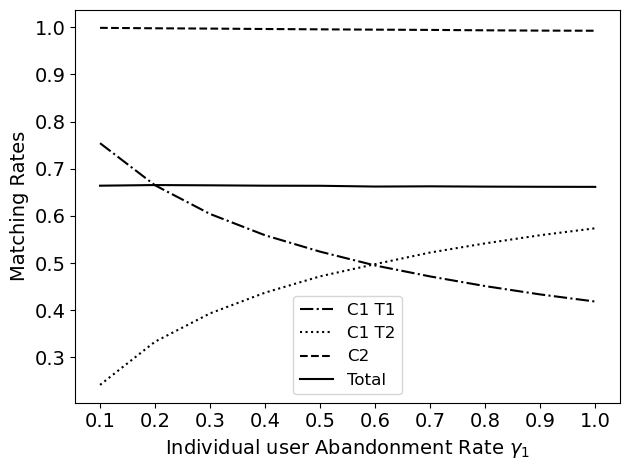

In [8]:
plt.xlabel(r'Individual user Abandonment Rate $\gamma_1$', fontsize=14)
plt.ylabel('Matching Rates', fontsize=14)
plt.plot(Abandonment_time, CE_Match_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(Abandonment_time, EE_Match_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(Abandonment_time, Job_Match_rates,  linestyle='dashed', label = 'C2', color='black')
plt.plot(Abandonment_time, Total_Match_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(gamma_1, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp3_Match.png')
plt.show()



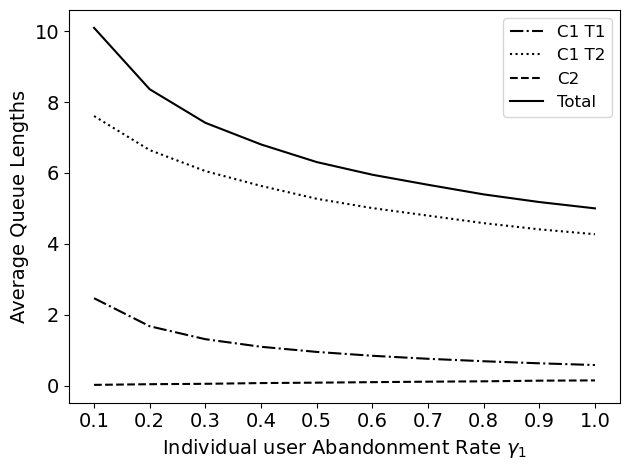

In [9]:
plt.xlabel(r'Individual user Abandonment Rate $\gamma_1$', fontsize=14)
plt.ylabel('Average Queue Lengths', fontsize=14)
plt.plot(Abandonment_time, CE_Queue_length, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(Abandonment_time, EE_Queue_length, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(Abandonment_time, Job_Queue_length,  linestyle='dashed', label = 'C2', color='black')
plt.plot(Abandonment_time, Total_Queue_length, linestyle='solid', label = 'Total', color='black')
plt.xticks(gamma_1, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp3_Queue.png')
plt.show()



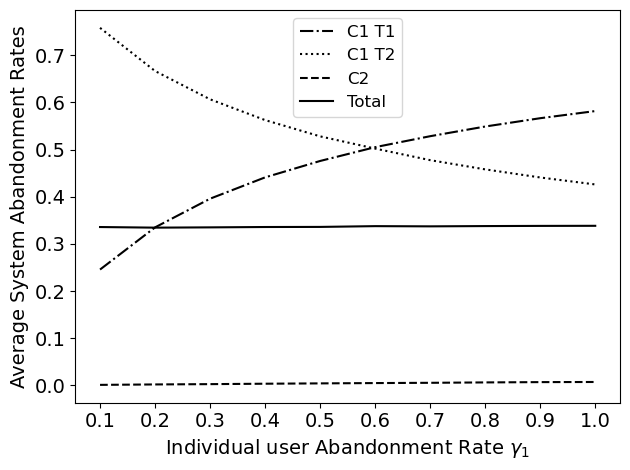

In [10]:
plt.xlabel(r'Individual user Abandonment Rate $\gamma_1$', fontsize=14)
plt.ylabel('Average System Abandonment Rates', fontsize=14)
plt.plot(Abandonment_time, CE_Abandon_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(Abandonment_time, EE_Abandon_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(Abandonment_time, Job_Abandon_rates, linestyle='dashed', label = 'C2', color='black')
plt.plot(Abandonment_time, Total_Abandon_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(gamma_1, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp3_Abandon.png')
plt.show()